In [1]:
# Import necessary libraries
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
# Load the dataset
data = pd.read_csv("../data/Employee_data.csv")

In [25]:
# Inspect data
print("Dataset Shape:", data.shape)
print("\nFirst Five Rows:")
print(data.head())


Dataset Shape: (1470, 35)

First Five Rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfacti

In [26]:
# Checking for missing values and data types
print("\nPrint Data Info:")
print(data.info)


Print Data Info:
<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  E

In [27]:
# Unique value count for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Features:")
for col in categorical_features:
    print(f"{col}: {data[col].nunique()} unique values")


Unique Values in Categorical Features:
Attrition: 2 unique values
BusinessTravel: 3 unique values
Department: 3 unique values
EducationField: 6 unique values
Gender: 2 unique values
JobRole: 9 unique values
MaritalStatus: 3 unique values
Over18: 1 unique values
OverTime: 2 unique values


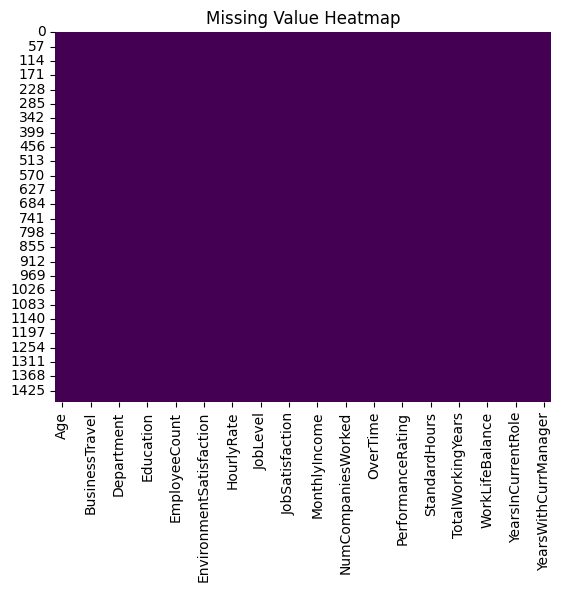

In [28]:
# Visualize missing values, if any
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [29]:
# Confirm no nulls
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [3]:
# Drop irrelevant columns
data.drop(columns=['Over18', 'EmployeeCount', 'StandardHours', 'EmployeeNumber'], inplace=True)

In [4]:
# Encode Attrition and other categorical columns
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})

In [ ]:
# Feature Engineering: Test Features
# The following section includes experimental feature engineering techniques to evaluate their impact on model performance. 
# These features are subject to refinement or removal based on the outcomes of the analysis.

First five rows of Role Stability feature:
   YearsInCurrentRole  YearsAtCompany  RoleStability
0                   4               6       0.571429
1                   7              10       0.636364
2                   0               0       0.000000
3                   7               8       0.777778
4                   2               2       0.666667


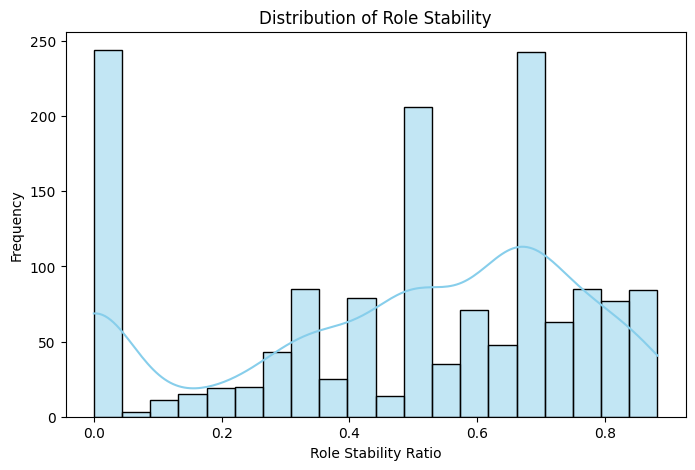

In [6]:
# Feature Engineering: Role Stability
# ------------------------------------
# Role Stability = YearsInCurrentRole / (YearsAtCompany + 1)
# Rationale:
# - Measures role consistency and stability within the company.
# - Low values indicate frequent role changes or short tenure in roles.
# - High values suggest stable and prolonged roles.

data['RoleStability'] = data['YearsInCurrentRole'] / (data['YearsAtCompany'] + 1)

# Inspect feature
print("First five rows of Role Stability feature:")
print(data[['YearsInCurrentRole', 'YearsAtCompany', 'RoleStability']].head())

# Check the distribution of Role Stability
plt.figure(figsize= (8, 5))
sns.histplot(data['RoleStability'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Role Stability')
plt.xlabel('Role Stability Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: Role Stability
# ---------------------------------
# RoleStability = YearsInCurrentRole / (YearsAtCompany + 1)
# 
# Outcome Summary:
# - The feature captures an employee's role tenure relative to their total time at the company.
# - Observations:
#   - A significant portion of employees have a Role Stability ratio of 0, indicating recent hires or frequent role changes.
#   - Employees with higher stability ratios (above 0.5) are more prevalent, suggesting that role stability could contribute to longer tenure.
#   - A dip near 0.5 suggests potential challenges for employees in this range, warranting further investigation.
# - Potential Insights:
#   - High turnover is likely among employees with low Role Stability, potentially due to dissatisfaction or lack of opportunities for role progression.
#   - High stability ratios might indicate employees in well-suited or stable roles, correlating with better retention.
# 
# Importance:
# - This feature provides a measurable factor to analyze employee retention and attrition patterns.

First five rows of OT_WorkLifeImpact:
   OverTime_Binary  WorkLifeBalance  OT_WorkLifeImpact
0                1                1           0.999990
1                0                3           0.000000
2                1                3           0.333332
3                1                3           0.333332
4                0                3           0.000000


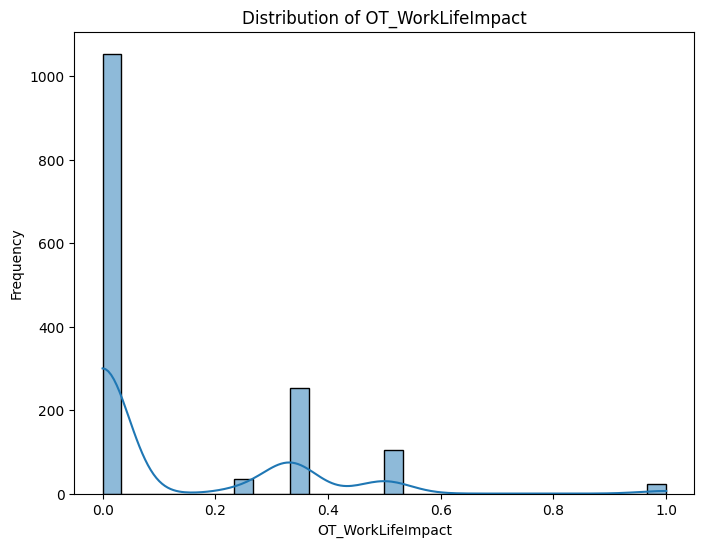

In [8]:
# Feature Engineer: OT_WorkLifeImpact
# ------------------------------------
# OT_WorkLifeImpact = OverTime (binary) / WorkLifeBalance
# Rationale:
# - Overtime can sometimes negatively impact work-life balance, contributing to attrition risk.
# - By combining the OverTime binary with the WorkLifeBalance score,
#   we can create a new feature to access to how much overtime affects and employees work-life balance.
# - Employees working overtime with low work-life balance scores may be at higher risk of attrition.

# Encode OverTime
data['OverTime_Binary'] = data['OverTime'].map({'Yes': 1, 'No': 0})

#Implement
data['OT_WorkLifeImpact'] = data['OverTime_Binary'] / (data['WorkLifeBalance'] + 1e-5)

# Inspect feature
print("First five rows of OT_WorkLifeImpact:")
print(data[['OverTime_Binary', 'WorkLifeBalance', 'OT_WorkLifeImpact']].head())

# Check distribution of OT_WorkLifeBalance
plt.figure(figsize=(8, 6))
sns.histplot(data['OT_WorkLifeImpact'], bins=30, kde=True)
plt.title('Distribution of OT_WorkLifeImpact')
plt.xlabel('OT_WorkLifeImpact')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Feature Analysis: OT_WorkLifeImpact
# ------------------------------------
# OT_WorkLifeImpact = OverTime_Binary / (WorkLifeBalance + 1e-5)
#
# Outcome Summary:
# - This feature captures the strain of overtime relative to an employee's work-life balance.
# - Observations:
#   - The distribution is heavily skewed towards lower values, with most employees experiencing little to no overtime strain.
#   - A smaller subset of employees shows higher values, indicating significant overtime combined with low work-life balance.
#   - A peak at 0 suggests a large group of employees who either do not work overtime or maintain a high work-life balance.
# - Potential Insights:
#   - Employees with OT_WorkLifeImpact values near 1 may experience significant work-life strain, increasing the risk of attrition.
#   - Employees with values closer to 0 likely face minimal work-life conflicts, suggesting lower attrition risk from this factor.
#
# Importance:
# - This feature provides insight into the relationship between overtime and work-life balance.
# - It can help identify employees at risk of burnout and attrition due to overtime-related stress.